In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [154]:
###R1 - import remainingdata.csv

df = pd.read_csv('remainingdata.csv')

# drop column id
df = df.drop(columns=['id'])
#print(df.to_string())
df

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,...,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_amnt,repay_fail
0,0.0,0.0,0.00000,36,0.00,0.00,1,4,0.0,1,...,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00,1
1,2500.0,2500.0,2500.00000,36,13.98,85.42,4,4,20004.0,1,...,0.0,981.0,21.3,10.0,3075.291779,3075.29,2500.00,575.29,90.85,0
2,5000.0,5000.0,5000.00000,36,15.95,175.67,4,4,59000.0,1,...,0.0,18773.0,99.9,15.0,2948.760000,2948.76,1909.02,873.81,175.67,1
3,7000.0,7000.0,7000.00000,36,9.91,225.58,10,0,53796.0,1,...,0.0,3269.0,47.2,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,0
4,2000.0,2000.0,2000.00000,36,5.42,60.32,10,4,30000.0,1,...,0.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34921,3000.0,3000.0,3000.00000,36,11.99,99.63,3,4,74250.0,0,...,0.0,16550.0,73.5,22.0,3586.619764,3586.62,3000.00,586.62,100.30,0
34922,10400.0,10400.0,10400.00000,36,13.49,352.88,9,4,62000.0,2,...,0.0,16898.0,39.7,33.0,12703.534030,12703.53,10400.00,2303.53,393.08,0
34923,16000.0,10550.0,10531.35818,60,14.96,250.77,10,0,95088.0,2,...,1.0,10386.0,62.2,25.0,14202.267530,14163.31,10550.00,3652.27,5439.96,0
34924,10000.0,10000.0,10000.00000,36,16.89,355.99,1,4,48720.0,1,...,0.0,7301.0,53.3,12.0,12815.178320,12815.18,10000.00,2815.18,380.63,0


In [155]:
#check all data type must be in numeric(int/float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34926 entries, 0 to 34925
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amount               34926 non-null  float64
 1   funded_amount             34926 non-null  float64
 2   funded_amount_investors   34926 non-null  float64
 3   term                      34926 non-null  int64  
 4   interest_rate             34926 non-null  float64
 5   installment               34926 non-null  float64
 6   employment_length         34926 non-null  int64  
 7   home_ownership            34926 non-null  int64  
 8   annual_income             34926 non-null  float64
 9   verification_status       34926 non-null  int64  
 10  loan_status               34926 non-null  int64  
 11  purpose                   34926 non-null  int64  
 12  debt_to_income_ratio      34926 non-null  float64
 13  no_delinquency_2yrs       34926 non-null  float64
 14  inquir

repay_fail
0    29836
1     5090
Name: count, dtype: int64


<Axes: ylabel='count'>

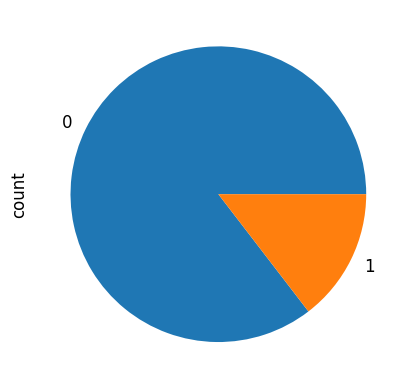

In [156]:
###R2 - count how repay_fail variable(0 and 1) to see if the data balance or not

Count_repay_fail = df['repay_fail'].value_counts()
print(Count_repay_fail)

df["repay_fail"].value_counts(dropna=False).plot(kind="pie")

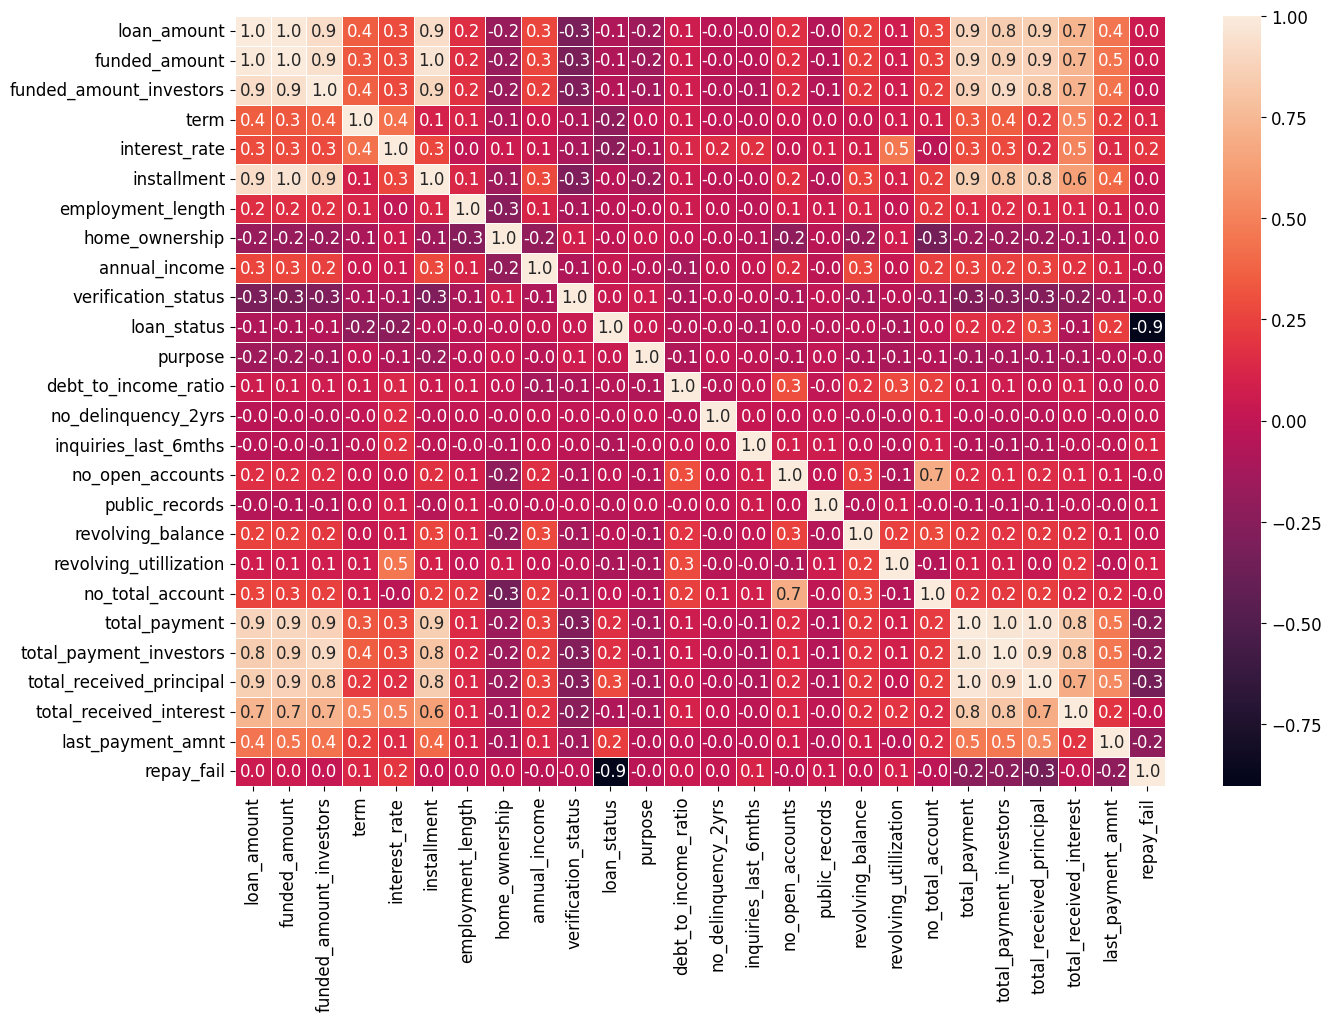

In [157]:
###R3 - use heatmap; to see relationships between two variables. Observe if there are any patterns in value for one or both variables.

f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

In [158]:
###R4 - split data to train and test with test saiz 0.2 

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='repay_fail'), df['repay_fail'], test_size=0.20, random_state=42)

In [159]:
#Initialize the Random Forest classifier with a maximum depth of 5
model = RandomForestClassifier(max_depth=5)

###R5 - Train the model using the training data
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [160]:
#Use the trained model to make predictions on the x_test 
y_predict = model.predict(X_test)

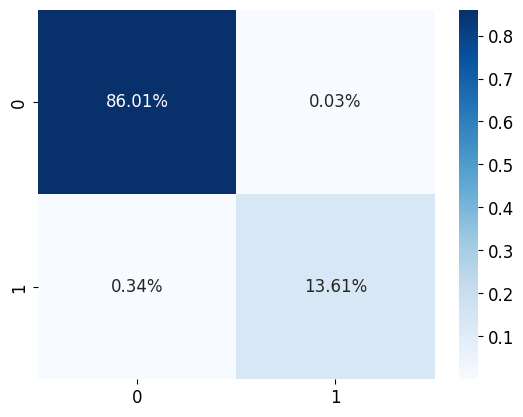

Accuracy is:  99.6278270827369


In [161]:
###R6 - evaluates the performance of a classification model using a confusion matrix and calculates the accuracy score.

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%", cmap='Blues')
plt.show()
ac = accuracy_score(y_test,y_predict)
print('Accuracy is: ',ac*100)

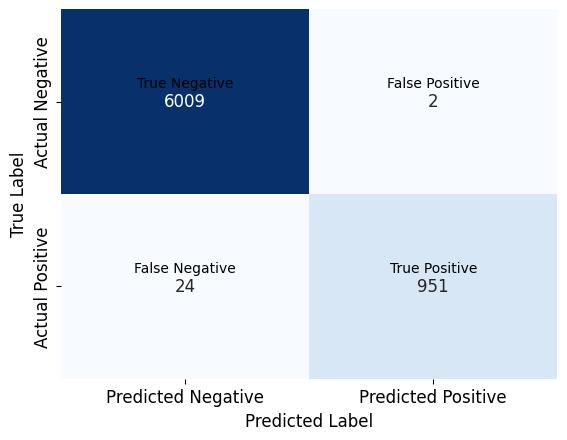

In [162]:
# y_test contains the true labels and predictions contains the predicted labels
cm = confusion_matrix(y_test, y_predict)

# Create a list of labels for each cell
label_names = [['True Negative', 'False Positive'],
               ['False Negative', 'True Positive']]

# Create a heatmap with labels inside the cells
sns.heatmap(cm,annot=True,fmt="d", cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels inside the cells
for i in range(len(label_names)):
    for j in range(len(label_names[0])):
        plt.text(j + 0.5, i + 0.4, label_names[i][j], ha='center', va='center', fontsize=10)

# Add labels to the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()


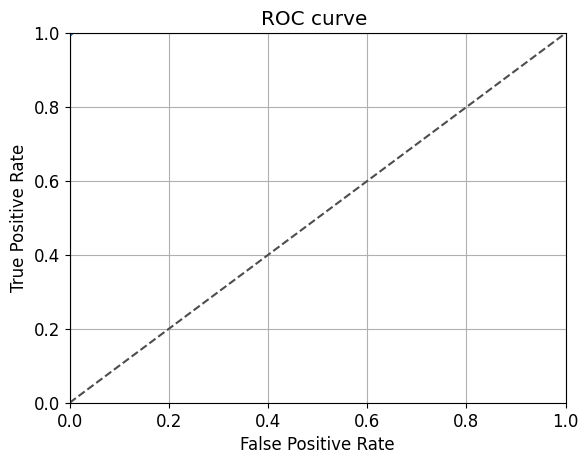

In [163]:
###R7 - evaluates the performance of your classification model using a Receiver Operating Characteristic (ROC) curve

y_pred_quant = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [164]:
auc(fpr, tpr)

0.9999733821327565

In [165]:
###R8 - Print a detailed classification report

from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6011
           1       1.00      0.98      0.99       975

    accuracy                           1.00      6986
   macro avg       1.00      0.99      0.99      6986
weighted avg       1.00      1.00      1.00      6986



In [166]:
###R9 - save trained model

import pickle as cPickle
with open('modelDataInbalance_25features','wb') as f:
    cPickle.dump(model,f)